#### Dataset Description

- Find the best ad to find and gain customers
- CTR (Click Through Rate) - How many times a customer clicks
- They prepared 10 different ads
- We are going to show each ad in each time the user visits the webpage and record result (clicked or not)
- The dataset just is a simulation where
    - each user is a row
    - each ad is a column

- ### Note
    - There is a cost to display the ad
    - therefore find

    - Dataset will suppose each ad has a fixed convergence rate

# Import Library

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

# Import Dataset

In [37]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing UCB

In [38]:
# Number of times ad i was selected
N = 10000
# Number of ads
d = 10
#
ads_selected = []
numbers_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward=0


for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            average_reward = sum_of_rewards[i]/ numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward *delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1

    reward = dataset.values[n,ad]

    sum_of_rewards[ad] +=  average_reward
    total_reward +=  reward

In [43]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

# Visualizing The Result

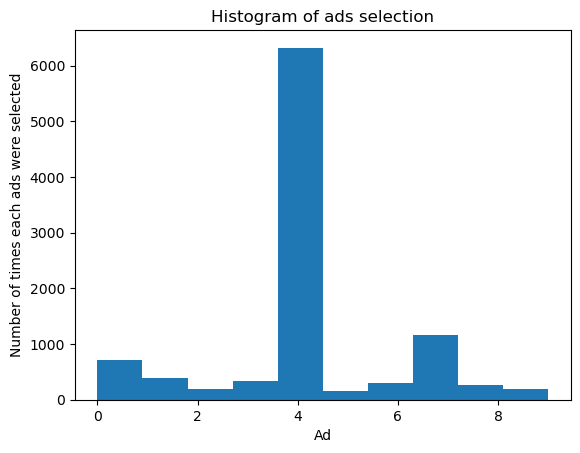

In [44]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ad')
plt.ylabel('Number of times each ads were selected')
plt.show()